Market Basket Analysis

loading all packages

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx

Read data

In [3]:
data=pd.read_csv('walmart.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Grouping by the users and the product they bought


In [6]:
items=data.groupby('User_ID')['Product_ID'].apply(list).reset_index()


In [7]:
items

,User_ID,Product_ID
0,1000001,"[P00069042, P00248942, P00087842, P00085442, P..."
1,1000002,"[P00285442, P00112842, P00293242, P00289342, P..."
2,1000003,"[P00193542, P00132842, P0098342, P00010242, P0..."
3,1000004,"[P00184942, P00346142, P0097242, P00046742, P0..."
4,1000005,"[P00274942, P00251242, P00014542, P00031342, P..."
...,...,...
5886,1006036,"[P00237642, P00250342, P00173242, P00255342, P..."
5887,1006037,"[P00067342, P00111842, P00323642, P00177442, P..."
5888,1006038,"[P00034742, P00251242, P00086042, P00109542, P..."
5889,1006039,"[P00114042, P00199442, P00088542, P00254242, P..."


In [8]:
transactions = items['Product_ID'].tolist()

Encoding the transaction as true or false(binary result) for the apriori to work(preprocessing for apriori)

In [12]:
tde=TransactionEncoder()
tde_data=tde.fit(transactions).transform(transactions)
tde_df=pd.DataFrame(tde_data,columns=tde.columns_)

Apllication of Apriori

In [21]:
item_set= apriori(tde_df,min_support=0.05,use_colnames=True)
item_set.shape[0]

2148

Understand :
Support - how many an item should occurs in the total num of transaction (num/total transaction) to get included
Confidence - how likly two product are bought together(support of xuy/support of x)
Lift - how likly 2 item are bought together than being bought individually(>1 more of positive correlation <1 more of negative correlation =1 indicates individual)



Interpretation:
Here we have applied a minimum threshold of 5% meaning if the item appear atleast 5% of the total no of transactions then it enters the itemset else omitted from entire process

Acquiring rule set

In [27]:
rules=association_rules(item_set,metric='confidence',min_threshold=0.5)
rules=rules[rules['antecedents'].apply(lambda x:len(x)>=2)& rules['consequents'].apply(lambda x:len(x)>=1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

Association Rules: 7


,antecedents,consequents,support,confidence,lift
22,"(P00057642, P00025442)",(P00110742),0.050416,0.508562,1.858521
23,"(P00112142, P00025442)",(P00110742),0.054660,0.510301,1.864878
24,"(P00237542, P00025442)",(P00110742),0.050246,0.512111,1.871491
25,"(P00110742, P00237542)",(P00025442),0.050246,0.522046,1.904255
26,"(P00145042, P00057642)",(P00270942),0.051095,0.500832,2.561112


Understand:
rule : milk->bread shows a support of 0.05 or more than our min support , having a confidence greater than the min threshold 
here milk -antecedant, bread - consequents

Interpretation:
here we paired up min of 2 antecedant to a min of 1 consequent,and set our minimum confidence threshold as 50%

Visualization of the products that usually bought together

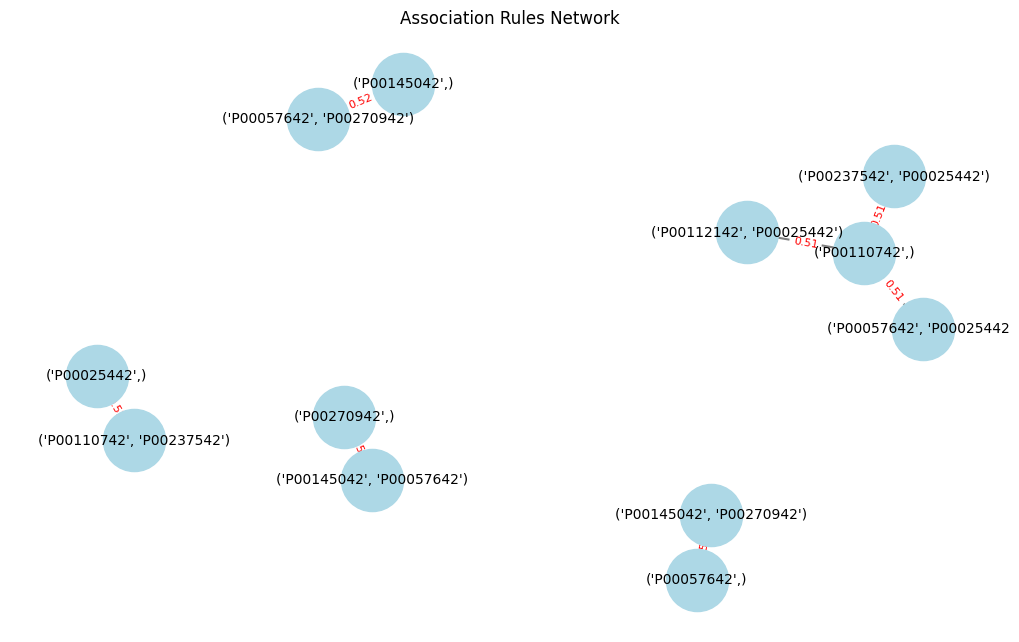

In [30]:
G=nx.Graph()
for _, row in rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    confidence = row['confidence']
    G.add_edge(tuple(antecedents), tuple(consequents), weight=confidence)
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_color='black', edge_color='gray', width=1.5)
# edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in G.edges(data=True)}   
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title('Association Rules Network')
plt.show()
